In [1]:
#%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print("start!")

rnorm=np.ones(20)
print (rnorm)

ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 2409))
N = 2409  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=1
for i in range(8):
    fol=format(i, '03b')
    for j in range(10):
        numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
        if(j==7):
            print(fname,numb)
            #print(dataall.nbytes)
#print(dataall.shape)
print("end")

start!
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
./glbdsk_str000M08.dat 9
./glbdsk_str001M08.dat 19
./glbdsk_str010M08.dat 29
./glbdsk_str011M08.dat 39
./glbdsk_str100M08.dat 49
./glbdsk_str101M08.dat 59
./glbdsk_str110M08.dat 69
./glbdsk_str111M08.dat 79
end


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


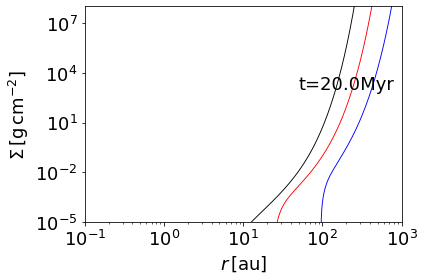

In [18]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-3
box_size_ymax = 1e+05
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-5
box_size_ymax = 1e+08
rnorm=np.ones(20)
print (rnorm)
#cmap=plt.get_cmap("cool")  
cmap=['k','r','r','r','r','r','b','r','b','b','b','r','b','r','b']
time=np.arange(0,201,10)
for cond in range(8):
    cond3=format(cond, '03b')
    for i in time:
                plt.cla()
                for j in [0,2,9]:
                #for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x0 = []
                    y0 = []
                    x0.extend(pltdat[:,0])
                    y0.extend(pltdat[:,1])
                    x0=np.dot(x0,rnorm[j%10])
                    #plt.plot(x0, y0, color=cmap[j],linewidth = 0.9, dashes=[6, 2])
                #for j in [0,2,9]:
                #for j in range(10):
                    #k=j+1+(cond*10)
                    #pltdat=dataall[:,:,k]
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,i+1])
                    x=np.dot(x,rnorm[j%10])
                    ys = []
                    y=np.array(y)
                    y0=np.array(y0)
                    ys=y/y0
                    plt.plot(x, ys, color=cmap[j],linewidth = 0.9)
                plt.xscale('log')
                plt.yscale('log')
                #plt.xlabel(r'$r\,[au]$', fontsize=18)
                #plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
                plt.xlabel(r'$r\,\rm[au]$', fontsize=18)
                plt.ylabel(r'$\Sigma\, \rm[g\,cm^{-2}]$', fontsize=18)
                plt.xlim(box_size_xmin, box_size_xmax)
                plt.ylim(box_size_ymin, box_size_ymax)
                #plt.title('Density '+cond3, fontsize=18)    
                plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
                testx = [1e-01,4.133,4.133,1e-01]
                testy = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx,testy,color="b",alpha=0.05)
                testx2 = [1e-01,1000,1000,1e-01]
                testy2 = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx2,testy2,color="b",alpha=0.015)
                plt.tick_params(labelsize=18)
                mpl.rcParams['axes.xmargin'] = 0
                mpl.rcParams['axes.ymargin'] = 0
                plt.tight_layout()
                plt.savefig("SurDenfrac"+str(cond)+"time"+str(i)+"[1,3,10]date0330.jpg")


[2.34422882 2.10980593 1.87538305 1.64096017 1.40653729 1.17211441
 0.93769153 0.70326864 0.46884576 0.23442288]
[2.03352394 2.87583714 3.52216679 4.06704789 4.54709777 4.98109604
 5.38019864 5.75167428 6.10057183 6.43056734]
[0.49175718 0.34772484 0.28391614 0.24587859 0.2199205  0.20075903
 0.18586674 0.17386242 0.16391906 0.15550727]


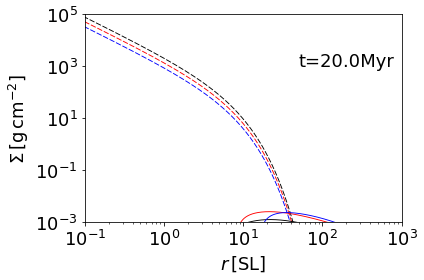

In [4]:
## L=M^1,2,4 snowline
import numpy as np
import scipy.optimize
X=np.linspace(1,0.1,10)#Mass distribution
parameter_initial = np.array([0,0])
def func(x,a,b):
    return  a*x
    #return  a*(x**2)
    #return  a*(x**4)
y4 = func(X,10**0.37,1)
rrnorm=(1.0/y4)**0.5
print(y4)
rnorm =rrnorm[::-1]/4.2
print (1/rnorm)

#Snowline
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-3
box_size_ymax = 1e+05


print (rnorm)
#cmap=plt.get_cmap("cool")  
cmap=['k','r','r','r','r','r','b','r','b','b','b','r','b','r','b']
time=np.arange(0,201,10)
for cond in range(8):
    cond3=format(cond, '03b')
    for i in time:
                plt.cla()
                for j in [0,2,9]:
                #for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,1])
                    x=np.dot(x,rnorm[j%10])
                    plt.plot(x, y, color=cmap[j],linewidth = 0.9, dashes=[6, 2])
                for j in [0,2,9]:
                #for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,i+1])
                    x=np.dot(x,rnorm[j%10])
                    plt.plot(x, y, color=cmap[j],linewidth = 0.9)
                plt.xscale('log')
                plt.yscale('log')
                #plt.xlabel(r'$r\,[au]$', fontsize=18)
                #plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
                plt.xlabel(r'$r\,\rm[SL]$', fontsize=18)
                plt.ylabel(r'$\Sigma\, \rm[g\,cm^{-2}]$', fontsize=18)
                plt.xlim(box_size_xmin, box_size_xmax)
                plt.ylim(box_size_ymin, box_size_ymax)
                #plt.title('Density '+cond3, fontsize=18)    
                plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
                testx = [1e-01,4.133,4.133,1e-01]
                testy = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx,testy,color="b",alpha=0.05)
                testx2 = [1e-01,1000,1000,1e-01]
                testy2 = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx2,testy2,color="b",alpha=0.015)
                plt.tick_params(labelsize=18)
                mpl.rcParams['axes.xmargin'] = 0
                mpl.rcParams['axes.ymargin'] = 0
                plt.tight_layout()
                plt.savefig("SurDenSL"+str(cond)+"time"+str(i)+"[1,3,10]date0330.jpg")

[2.34422882 2.10980593 1.87538305 1.64096017 1.40653729 1.17211441
 0.93769153 0.70326864 0.46884576 0.23442288]
[1.30726539 1.84875245 2.26425008 2.61453078 2.92313428 3.20213317
 3.45869913 3.6975049  3.92179618 4.13393615]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


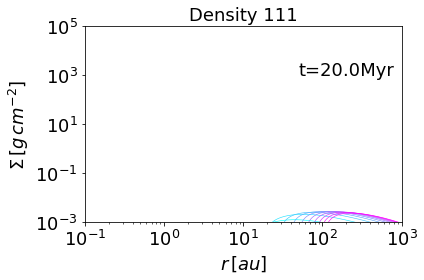

In [5]:
## L=M^1,2,4 snowline
import numpy as np
import scipy.optimize
X=np.linspace(1,0.1,10)#Mass distribution
parameter_initial = np.array([0,0])
def func(x,a,b):
    return  a*x
    #return  a*(x**2)
    #return  a*(x**4)
y4 = func(X,10**0.37,1)
rrnorm=(1.0/y4)**0.5
print(y4)
rnorm =rrnorm[::-1]/2.7
print (1/rnorm)

#Snowline
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
time=np.arange(0,201,10)
for cond in range(8):
    cond3=format(cond, '03b')
    for i in time:
                plt.cla()
                for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,i+1])
                    x=np.dot(x,rnorm[j%10])
                    plt.plot(x, y, color=cmap(j*30),linewidth = 0.6)
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel(r'$r\,[au]$', fontsize=18)
                plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
                plt.xlim(box_size_xmin, box_size_xmax)
                plt.ylim(box_size_ymin, box_size_ymax)
                plt.title('Density '+cond3, fontsize=18)    
                plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
                testx = [1e-01,1.0,1.0,1e-01]
                testy = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx,testy,color="b",alpha=0.05)
                testx2 = [1e-01,1000,1000,1e-01]
                testy2 = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx2,testy2,color="b",alpha=0.015)
                plt.tick_params(labelsize=18)
                mpl.rcParams['axes.xmargin'] = 0
                mpl.rcParams['axes.ymargin'] = 0
                plt.tight_layout()
                plt.savefig("SurDenSL"+str(cond)+"time"+str(i)+"blunkdate1015.jpg")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


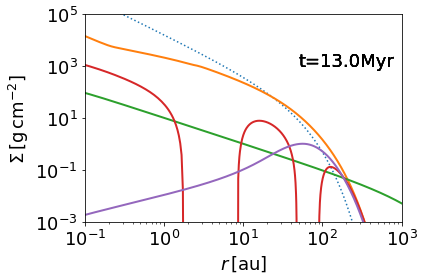

In [12]:
#au任意
box_size_xmin = 1e-1
box_size_xmax = 1e+3
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
time=np.arange(0,201,10)
i=130

k=9
pltdat=dataall[:,:,k]
x = []
y = []
x.extend(pltdat[:,0])
y.extend(pltdat[:,1])
x=np.dot(x,rnorm[j%10])
plt.plot(x, y,linewidth = 1.5,linestyle="dotted")

for cond in [0,1,2,4]:
    cond3=format(cond, '03b')
    for i in [130]:
                #plt.cla()
                for j in [9]:
                #for j in range(10):
                    k=j+1+(cond*10)
                    pltdat=dataall[:,:,k]
                    #data = np.loadtxt("./dust%d.dat" % (i*5));
                    x = []
                    y = []
                    x.extend(pltdat[:,0])
                    y.extend(pltdat[:,i+1])
                    x=np.dot(x,rnorm[j%10])
                    plt.plot(x, y,linewidth = 2)
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel(r'$r\,\rm[au]$', fontsize=18)
                plt.ylabel(r'$\Sigma\, \rm[g\,cm^{-2}]$', fontsize=18)
                plt.xlim(box_size_xmin, box_size_xmax)
                plt.ylim(box_size_ymin, box_size_ymax)
                #plt.title('Density '+cond3, fontsize=18)    
                plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
                testx = [1e-01,4.133,4.133,1e-01]
                testy = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx,testy,color="b",alpha=0.05)
                testx2 = [1e-01,1000,1000,1e-01]
                testy2 = [1e-03,1e-03,1e-01,1e-01]
                #plt.fill(testx2,testy2,color="b",alpha=0.015)
                plt.tick_params(labelsize=18)
                mpl.rcParams['axes.xmargin'] = 0
                mpl.rcParams['axes.ymargin'] = 0
                plt.tight_layout()
plt.savefig("fig13Myreach.png")

